<a href="https://colab.research.google.com/github/joaojulio/StudyProjects/blob/master/Alura_quarentenadados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Exploração prévia

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
plt.style.use('seaborn')

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [3]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
filmes.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
filmes.columns = ["filmeId", "titulo","generos"]

In [6]:
filmes.head(1)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

In [0]:
avaliacoes.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [0]:
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]

In [9]:
avaliacoes.head(1)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703


In [10]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
avaliacoes[avaliacoes['filmeId']==1].head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [13]:
avaliacoes.query('filmeId==1').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [14]:
avaliacoes[avaliacoes['filmeId']==1].describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [15]:
avaliacoes[(avaliacoes['filmeId']==1) & (avaliacoes['nota']==0.5)]['usuarioId'].count()

1

In [16]:
avaliacoes[(avaliacoes['filmeId']==1) & (avaliacoes['nota']==5.0)]['usuarioId'].count()

47

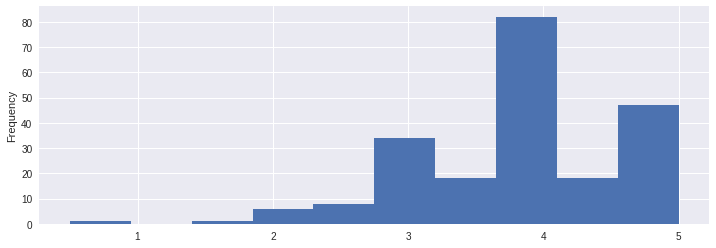

In [166]:
avaliacoes[avaliacoes['filmeId']==1]['nota'].plot(kind='hist', figsize=(12,4))

In [18]:
media_nota = avaliacoes.groupby('filmeId')['nota'].mean()
media_nota

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
notas_medias_por_filme = filmes.join(media_nota, on='filmeId')

In [20]:
notas_medias_por_filme.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
notas_medias_por_filme = notas_medias_por_filme.rename(columns={'nota':'nota_media'})

In [22]:
notas_medias_por_filme.columns

Index(['filmeId', 'titulo', 'generos', 'nota_media'], dtype='object')

## Exploração dos dados

In [23]:
notas_medias_por_filme['nota_media'].isnull().sum()

18

In [39]:
notas_medias_por_filme[notas_medias_por_filme['nota_media'].isnull()]['titulo']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

In [40]:
numero_avaliacoes = avaliacoes.groupby('filmeId')['usuarioId'].sum()
numero_avaliacoes

filmeId
1         65904
2         36251
3         14747
4          1539
5         14679
          ...  
193581      184
193583      184
193585      184
193587      184
193609      331
Name: usuarioId, Length: 9724, dtype: int64

In [0]:
filmes_avaliados = notas_medias_por_filme.join(numero_avaliacoes, on='filmeId')

In [42]:
filmes_avaliados.columns

Index(['filmeId', 'titulo', 'generos', 'nota_media', 'usuarioId'], dtype='object')

In [0]:
filmes_avaliados = filmes_avaliados.rename(columns={'usuarioId':'total_avaliacoes'})

In [47]:
filmes_avaliados.head()

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,65904.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,36251.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,14747.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1539.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,14679.0


In [48]:
filmes_avaliados['total_avaliacoes'].describe()

count      9724.000000
mean       3381.879782
std        6979.282007
min           1.000000
25%         474.000000
50%         989.500000
75%        2948.000000
max      101385.000000
Name: total_avaliacoes, dtype: float64

In [0]:
filmes_avaliados['nota_media'] = filmes_avaliados['nota_media'].round(2)

In [52]:
filmes_avaliados.head()

,filmeId,titulo,generos,nota_media,total_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,65904.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,36251.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,14747.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,1539.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,14679.0


Tentei usando uma lógica de solução de um exercício anterior, mas não deu certo porque faltou 1 gênero

In [122]:
filmes_avaliados['generos'].apply(lambda genero: genero.split('|')[0]).sort_values().unique()

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'], dtype=object)

In [129]:
filmes_avaliados['generos'].apply(lambda genero: genero.split('|')[0]).sort_values().nunique()

19

O código abaixo peguei na internet e retornou o resultado certo, mas não conehço as bibliotecas.

In [0]:
temp = filmes_avaliados['generos'].str.split('|').tolist()
import functools
import operator

generos_unicos = set(functools.reduce(operator.concat, temp))

In [125]:
generos_unicos

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [128]:
len(generos_unicos)

20

Usei o método get_dummies que já aprendi.

In [0]:
generos_dos_filmes = filmes_avaliados['generos'].str.get_dummies()

In [145]:
generos_dos_filmes.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
generos_dos_filmes.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [148]:
generos_dos_filmes.sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

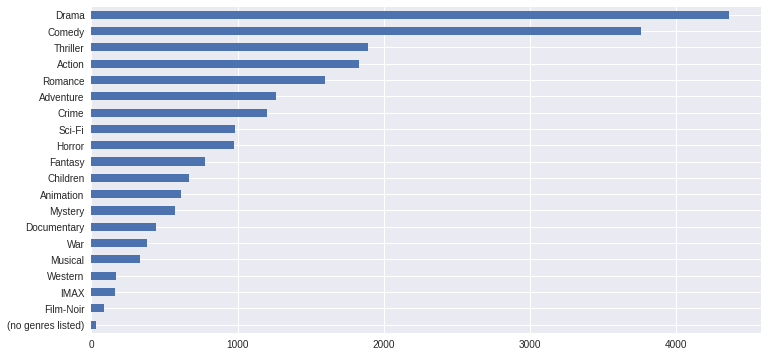

In [167]:
generos_dos_filmes.sum().sort_values().plot(kind='barh', figsize=(12,6))